In [1]:
import numpy as np
import pandas as pd
import requests
import warnings
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import talib

In [2]:
url = 'https://in.investing.com/indices/s-p-cnx-nifty-historical-data?end_date=1615228200&st_date=984076200'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

dfs = pd.read_html(r.text)
niftyDay = dfs[1]

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
niftyDay['Date'] = pd.to_datetime(niftyDay['Date'])
niftyDay = niftyDay.iloc[::-1]
niftyDay['Close'] = niftyDay['Price']
niftyDay = niftyDay.dropna()
niftyDay = niftyDay.reset_index(drop=True)
niftyDay = niftyDay[['Date', 'Close']]

In [3]:
spyDay = pd.read_csv(r'D:\Quantalius\Research\niftyOverfitting\csv\SPY.csv')
spyDay['Date'] = pd.to_datetime(spyDay['Date'])
spyDay = spyDay[['Date', 'Close']]

In [4]:
comp = pd.DataFrame()
comp = niftyDay.merge(spyDay, on='Date', suffixes=("NIFTY", "SPY"))

In [5]:
comp.head()

,Date,CloseNIFTY,CloseSPY
0,2001-03-09,1254.75,123.360001
1,2001-03-12,1197.95,118.080002
2,2001-03-13,1124.70,120.019997
3,2001-03-14,1194.20,117.650002
4,2001-03-15,1217.15,117.680000


LINEARREG_ANGLE draws a regression line over prices of last x days and measure the angle. 

In [6]:
comp['niftyLRA'] = talib.LINEARREG_ANGLE(comp['CloseNIFTY'], 20)
comp['spyLRA'] = talib.LINEARREG_ANGLE(comp['CloseSPY'], 20)

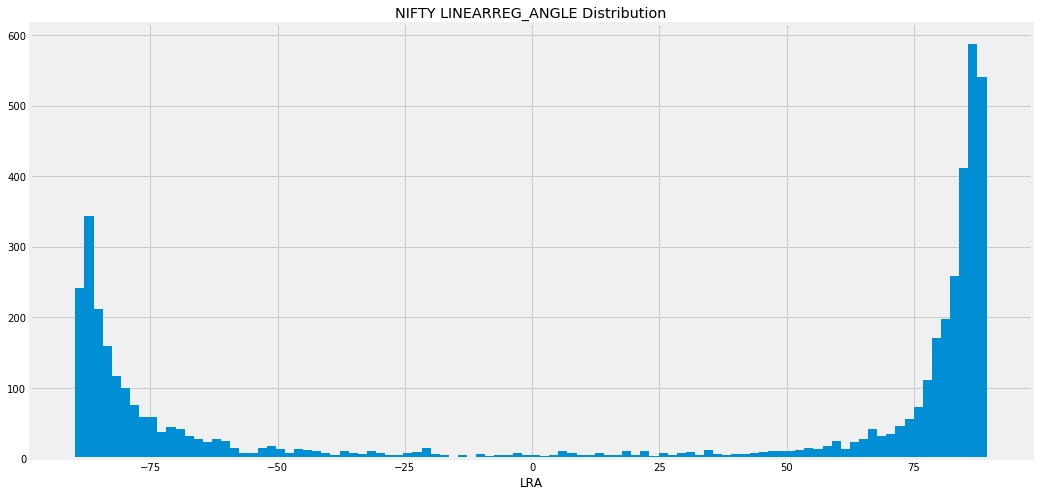

In [7]:
plt.figure(figsize=(16,8))
plt.hist(comp['niftyLRA'], bins=100)
plt.title("NIFTY LINEARREG_ANGLE Distribution")
plt.xlabel("LRA")
plt.show()

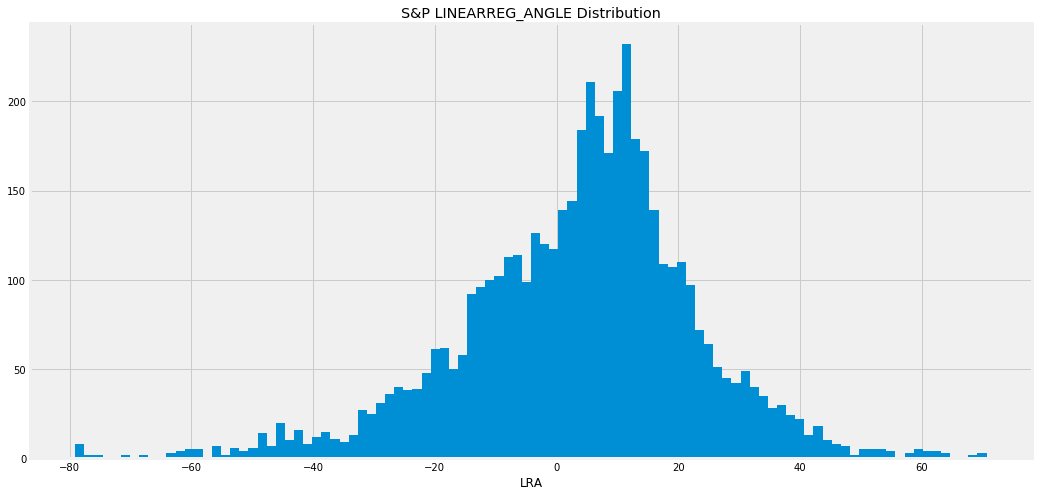

In [8]:
plt.figure(figsize=(16,8))
plt.hist(comp['spyLRA'], bins=100)
plt.title("S&P LINEARREG_ANGLE Distribution")
plt.xlabel("LRA")
plt.show()

In [9]:
print("Correlation of NIFTY and SPY : ",comp.corr()['CloseNIFTY'][1])

Correlation of NIFTY and SPY :  0.931960391725522
